In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

In [114]:
df = pd.read_csv('data/cclebeta.csv', index_col=0)
df.head()

,Beta,1,2,9,10,12,13,14,15,16,...,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829
22rv1,5.625000e-08,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,...,3.641889,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101
42mgba,2.409000e-02,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,...,3.527367,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095
5637,9.217000e-03,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,...,3.502305,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733
647v,6.135000e-02,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,...,3.402495,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024
769p,1.736000e-02,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,...,3.720749,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068


In [115]:
columns = df.columns.tolist()
columns.insert(len(columns), columns.pop(0))
data = df[columns]
data.head()

,1,2,9,10,12,13,14,15,16,18,...,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
22rv1,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,5.448634,...,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101,5.625000e-08
42mgba,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,7.104628,...,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095,2.409000e-02
5637,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,3.573155,...,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733,9.217000e-03
647v,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,6.962116,...,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024,6.135000e-02
769p,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,4.266400,...,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068,1.736000e-02


In [116]:
# Create a copy for further processing
dataset = data.copy()
# Get some basic data about dataset
print(len(dataset))

494


In [117]:
fs_df = dataset[['7128', '2200', '4606', '23240', '7045', '2040', '83877', '6414', '3134', '8313', '29126', '200916', '547', '221749', '5270', '7036', '51083', '8942', '3428', '6482', '4318', '5565', '2354', '6423', '3177', '2212', '3487', '4803', '134265', '8038', '175', '113189', '10265', '4811', '65108', '3958', '162968', '5352', '23225', '11145', '283248', '11120', '64850', '79191', '55970', '63893', '128553', '63901', '54103', '84527', '8764', '3758', '90187', '80380', '8613', '2806', '6907', '56961', '284459', '114907', '2161', '28971', '2550', '79366', '7376', '131566', '3000', '6678', '976', '8189', '4939', '26022', '3123', '135398', '1875', '1827', '55769', '11034', '932', '933', '314', '27042', '120379', '10219', '1145', '51754', '833', '1728', '114769', '201161', '57124', '84518', '23643', '1200', '27254', '9196', '80256', '55778', '58472', '54440', '6591', '64065', '4854', '7556', '53335', '834', '66035', '23149', '2990', '253650', '27000', '23127', '83982', '285521', '51141', '79979', '6988', '6583', '29121', '79705', '10054', '79778', '284161', '80346', '23198', '11140', '9578', '130612', '2637', '26157', '54677', '127018', '3107', '1535', '132160', '284359', '25825', '9445', '81786', '79630', '10897', '133957', '81555', '1104', '201725', '57099', '26960', '10101', '65010', '6843', '7277', '8887', '11200', '84461', '84868', '84817', '285440', '92912', '10611', '1019', '2323', '84079', '54959', '84513', '3732', '57666', '4992', '30846', '100507436', '1791', '19', '2335', '5654', '55506', '57332', '4914', '11311', '147945', '23475', '1152', '154141', '80765', '7130', '64759', '116372', '7099', '50805', '116842', '9052', '203054', '7776', '10384', '9564', '6484', '1012', '23363', '1846', '84057', '116447', '84504', '286343', '1837', '54811', '81608', '8904', '3631', '153657', '90850', '11138', '10457', '84678', '7975', '9755', '970', '309', '54981', '51128', '2027', '6721', '226', '4862', '2934', '9127', '84986', '84675', '116362', '3176', '4584', '125488', '347735', '6502', '9516', '8355', '26040', '339456', '9368', '162962', '56131', '65250', '27314', '79412', '79411', '25777', '8406', '389206', '81611', '23608', '8870', '51091', '79570', '89845', '57465', '65008', '64210', '3049', '84306', '11188', '64753', '770', '79744', '56139', '126789', '345462', '8857', '116442', '6890', '92092', '253639', '79132', '90525', '135228', '6297', '1607', '11180', '5054', '84808', '8970', '54514', '121551', '8971', '5360', '307', '1407', '57722', '54947', '55654', '10564', '59348', '4070', '79171', '2099', '1381', '51764', '400916', '27146', '10105', '79815', '79056', '3299', '8277', '199870', '79365', '56937', '57191', '928', '124220', '56107', '9290', '4200', '421', '5932', '1716', '43', '6663', '1307', '2123', '55787', '23541', '3767', '7678', '201895', '55228', '3073', '4913', '10011', '54756', '64747', '10211', '121642', '93474', '167359', '147920', '54813', '23632', '7536', '2950', '1280', '5507', '8490', '10397', '11151', '2588', '54961', '23025', '831', '3572', '9358', '91526', '221477', '134429', '84752', '120526', '4140', '5071', '283358', '3760', '84522', '83729', '6892', '1295', '84919', '6004', '220972', '5920', '8028', '84660', '7428', '5212', '5901', '57491', '3183', '26229', '23530', '51585', '94101', '55432', '84332', '124401', '79714', '92747', '115201', '768206', '5834', '79018', '85236', '6936', '2634', '3012', '7275', '4189', '23210', '3651', '1645', '54857', '89886', '483', '26999', '353324', '126393', '518', '11132', '273', '26354', '163071', '26261', '47', '29995', '283316', '54492', '10129', '57619', '6503', '11156', '56924', '140701', '10554', '137872', '1184', '10622', '65117', '6300', '83987', '127002', '127262', '3899', '80824', '11021', '126661', '9829', '400569', '57167', '57188', '1491', '93210', '57057', '5744', '8574', '25938', '100505741', '23659', '4651', '10981', '4000', '55720', '93432', '51575', '79850', '3320', '10256', '79187', '1852', '7087', '5378', '9976', '3135', '2289', '9654', '80150', '5918', '23029', '10447', '84133', '112840', '6597', '6875', '25803', '23316', '23545', '51279', '151126', '57571', '22849', '23371', '116412', '78992', '1877', '27154', '23404', '661', '285598', '1294', '10512', '84033', '54620', '8407', '392', '126129', '165055', '285613', '2995', '7554', '22883', '165530', '6881', '55076', '91746', '65249', '7324', '3117', '51368', '6285', '645', '199', '23550', '7327', '26121', '11236', '10016', '286410', '57169', '5291', '81502', '5796', '162394', '257019', '9942', '147746', '23450', '4123', '1627', '10910', '65993', '6584', '81542', '79927', '402160', '22997', '348013', '11022', '25873', '3425', '140609', '23173', '54619', 'Beta']]
fs_df.head()

,7128,2200,4606,23240,7045,2040,83877,6414,3134,8313,...,402160,22997,348013,11022,25873,3425,140609,23173,54619,Beta
22rv1,4.402121,4.139853,3.424222,5.514512,4.622096,7.367240,9.439951,8.568848,4.996617,4.692653,...,3.627874,3.906378,3.498235,5.371301,12.968781,4.250298,11.140860,10.356822,5.390891,5.625000e-08
42mgba,6.579177,11.068171,3.753007,6.635553,14.645582,6.252846,10.338984,4.318962,6.823931,4.694907,...,4.015202,4.046891,3.770497,4.366095,12.782077,4.113062,11.290641,9.395118,5.057323,2.409000e-02
5637,10.911707,5.098852,3.895225,7.449919,13.147208,5.714223,10.589864,3.406280,7.302050,4.645974,...,3.950122,4.027531,3.974158,5.225357,12.757425,4.508946,9.709767,10.190603,5.218091,9.217000e-03
647v,7.489423,4.761881,3.904380,7.758031,12.141894,4.702322,11.029194,4.330587,7.768741,4.614166,...,4.270287,4.142130,3.703377,5.814621,12.317219,4.675026,10.867293,10.081042,5.804863,6.135000e-02
769p,8.528210,4.573545,3.754414,6.175589,12.395736,6.733405,10.463308,3.791684,7.571176,4.396661,...,3.876271,4.107423,3.826263,4.724475,12.920341,4.439072,9.767138,11.115793,5.243291,1.736000e-02


In [118]:
# Split the Dataset and create train and test sets
train_dataset = fs_df.sample(frac=0.8, random_state=0)
test_dataset = fs_df.drop(train_dataset.index)
########################################################
# Separate labels and features
train_features = train_dataset.drop(["Beta"], axis=1)
test_features = test_dataset.drop(["Beta"], axis=1)
train_labels = train_dataset["Beta"].apply(lambda x:x*100)
test_labels = test_dataset["Beta"]

In [119]:
# Let's check some basic data about dataset
# train_dataset.describe().transpose()

In [120]:
# But we can also apply normalization using sklearn.
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()
########################################################
# Fit on Training Data
feature_scaler.fit(train_features.values)
label_scaler.fit(train_labels.values.reshape(-1, 1))
########################################################
# Transform both training and testing data
train_features = feature_scaler.transform(train_features.values)
test_features = feature_scaler.transform(test_features.values)
train_labels = label_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = label_scaler.transform(test_labels.values.reshape(-1, 1))

In [121]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [122]:
# Compile the model
model.compile(optimizer="Adam",
              loss="mean_absolute_error")

In [123]:
# Now let's train the model
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8805 - val_loss: 0.3862
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6519 - val_loss: 0.5204
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5549 - val_loss: 0.4198
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4803 - val_loss: 0.5119
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4174 - val_loss: 0.4785
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3654 - val_loss: 0.4913
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3175 - val_loss: 0.5302
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2794 - val_loss: 0.5593
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2551 - val_loss: 0.5871
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2420 - val_loss: 0.5212
Epoch 11/

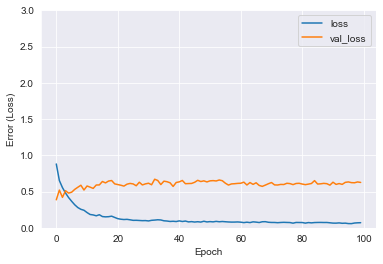

In [124]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,3])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)
########################################################
plot_loss(history)

In [125]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 0.6259


0.6259338855743408

In [126]:
# Save model
model.save("data/beta_model.h5")

In [127]:
# Load and perform predictions
saved_model = tf.keras.models.load_model('data/beta_model.h5')
results = saved_model.predict(test_features)
########################################################
# We can decode using the scikit-learn object to get the result
decoded_result = label_scaler.inverse_transform(results.reshape(-1,1))

4/4 [==============================] - 0s 1ms/step


In [128]:
decoded_labels = label_scaler.inverse_transform(test_labels.reshape(-1,1))

In [129]:
label_list = []
pred_list = []
for i in range(len(decoded_result)):
    label_list.append(decoded_labels[i][0])
    pred_list.append(decoded_result[i][0]/100)

Slope: 0.1815626172374256
Intercept: 0.006385037731558281
R-Squared: 0.12736745324307816
P-Value: 0.00028779878404275506
Standard Error: 0.0482533020676726


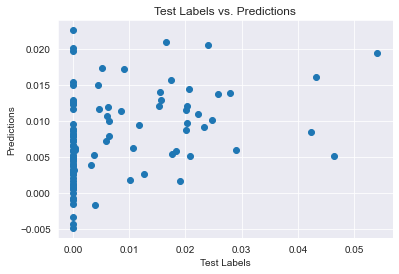

In [130]:
import scipy.stats as stats
X_var = label_list
y_var = pred_list
plt.plot(X_var, y_var, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(X_var, y_var)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()